In [1]:
import pandas as pd

In [2]:
StudentP_df = pd.read_csv(r"D:\sam_py_course\ML Projects\student performance\Student_Performance.csv")

In [3]:
StudentP_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Target variable

In [4]:
StudentP_df['Performance Index'].nunique()

91

### Misssing values

In [5]:
StudentP_df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## DRop Duplicates

In [6]:
StudentP_df.duplicated().sum()

np.int64(127)

In [7]:
StudentP_dfnew=StudentP_df.drop_duplicates()

In [8]:
StudentP_dfnew=StudentP_dfnew.reset_index(drop= True)

In [9]:
StudentP_dfnew.duplicated().sum()

np.int64(0)

In [10]:
StudentP_dfnew.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Outliers

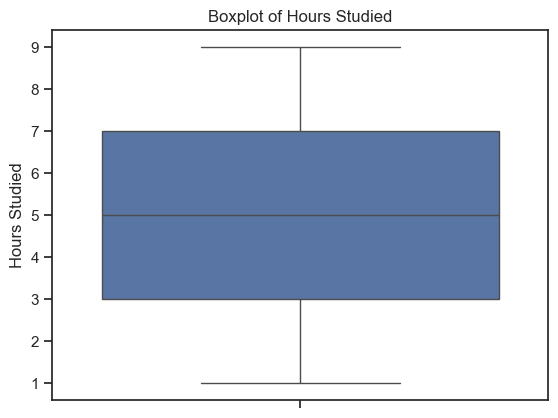

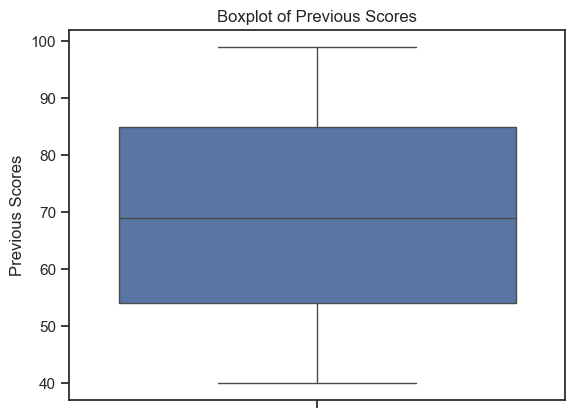

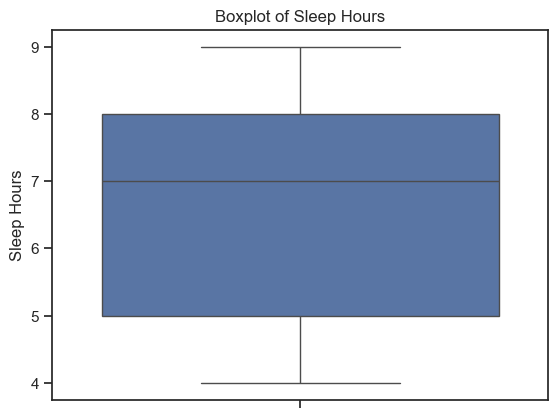

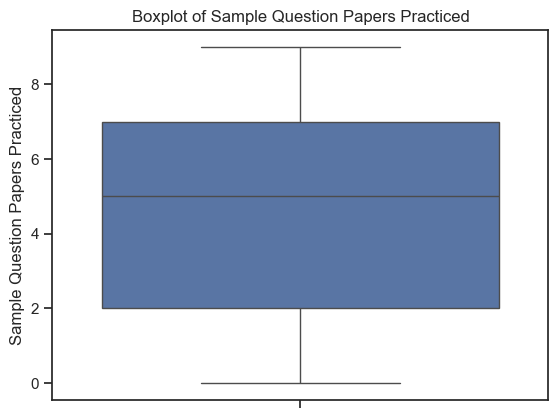

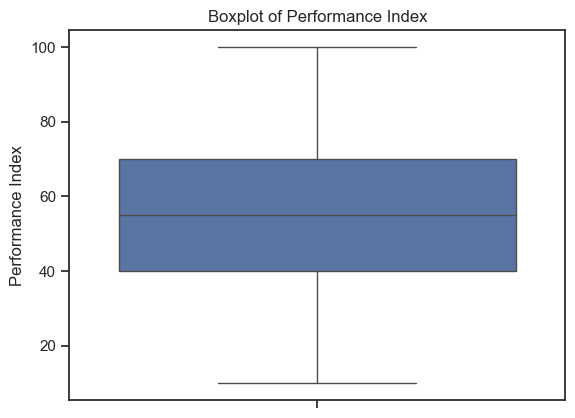

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols= ['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']
sns.set(style='ticks')


for col in numeric_cols:
    sns.boxplot(y=StudentP_dfnew[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Scailing(Normalization)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
StudentP_dfnew.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [15]:
StudentP_dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 462.9+ KB


In [16]:
scaling_columns = ['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced']

In [17]:
normalized = scaler.fit_transform(StudentP_dfnew[scaling_columns])

In [18]:
StudentP_dfnew[scaling_columns] = normalized

In [19]:
StudentP_dfnew.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,Yes,1.454025,-1.249715,91.0
1,-0.383205,0.724912,No,-1.491315,-0.900925,65.0
2,1.161822,-1.064438,Yes,0.275889,-0.900925,45.0
3,0.003052,-1.006717,Yes,-0.902247,-0.900925,36.0
4,0.775566,0.320865,No,0.864957,0.145444,66.0


## Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
corr_df=StudentP_dfnew.corr(numeric_only=True)

<Axes: >

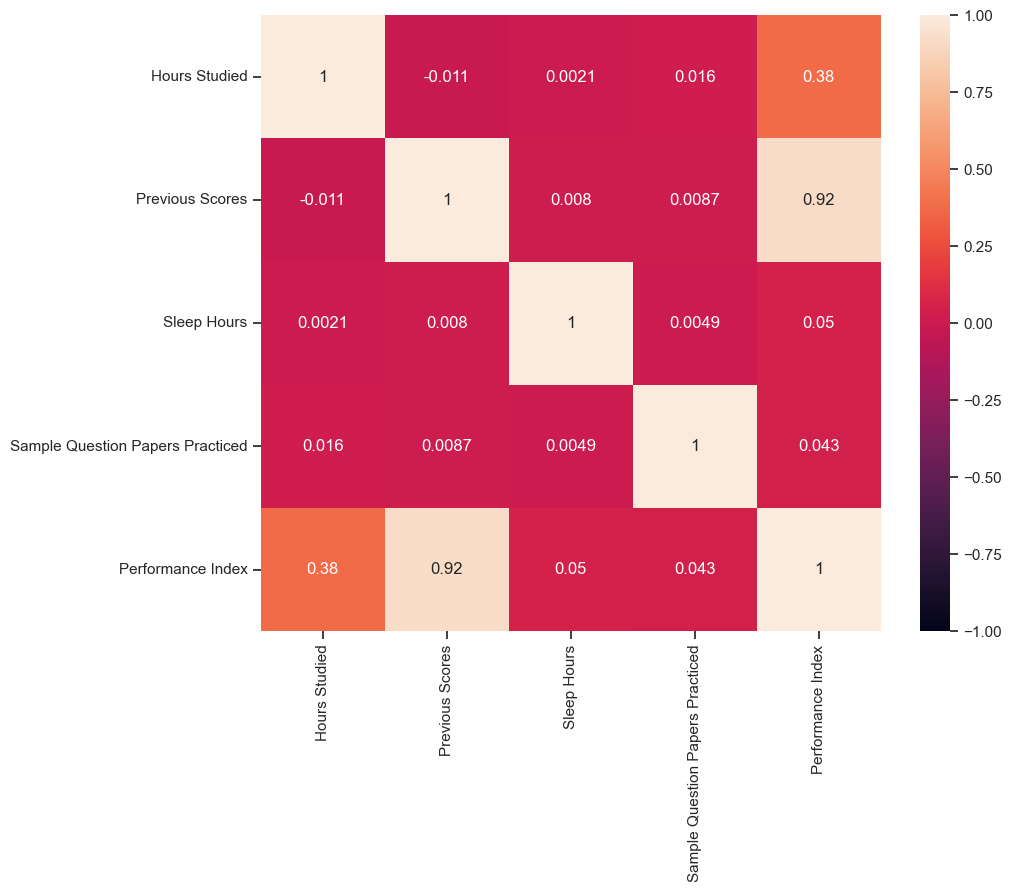

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot=True,vmin=-1)

(array([1605., 1580.,    0., 1645.,    0., 1653.,    0., 1784.,    0.,
        1606.]),
 array([-1.49131517, -1.19678117, -0.90224717, -0.60771317, -0.31317917,
        -0.01864517,  0.27588883,  0.57042283,  0.86495683,  1.15949083,
         1.45402483]),
 <BarContainer object of 10 artists>)

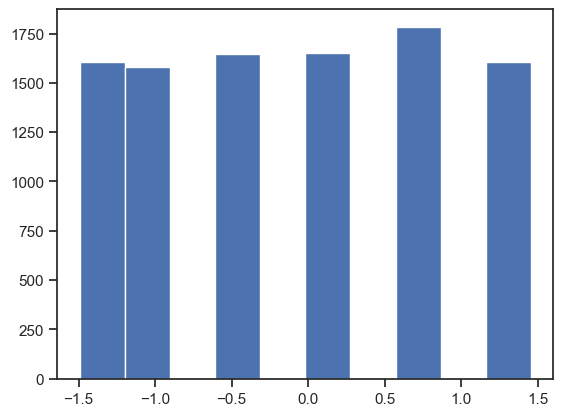

In [23]:
plt.hist(StudentP_dfnew['Sleep Hours'])

(array([ 174.,  618., 1092., 1482., 1461., 1462., 1434., 1209.,  735.,
         206.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

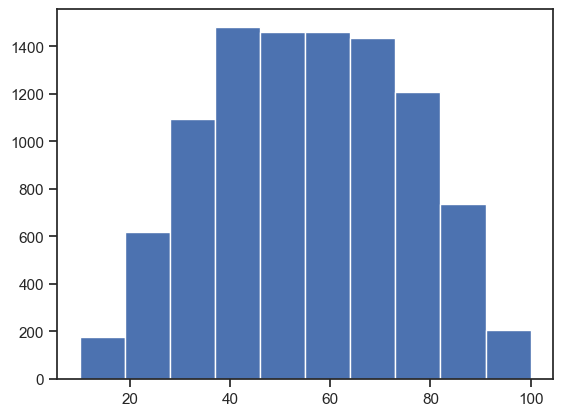

In [24]:
plt.hist(StudentP_dfnew['Performance Index'])

(array([1133., 1077., 1110., 1071., 1069.,    0., 1122., 1118., 1074.,
        1099.]),
 array([-1.54197634, -1.23297076, -0.92396518, -0.6149596 , -0.30595402,
         0.00305156,  0.31205714,  0.62106272,  0.9300683 ,  1.23907388,
         1.54807946]),
 <BarContainer object of 10 artists>)

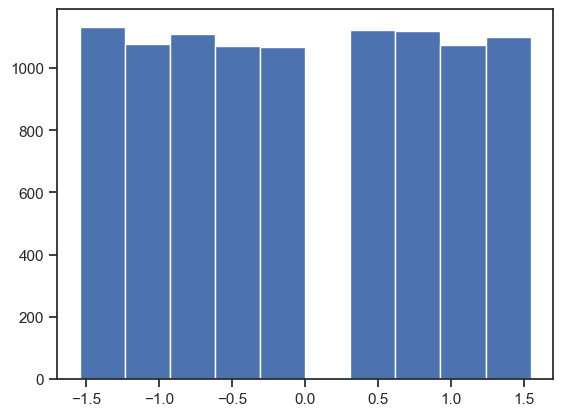

In [25]:
plt.hist(StudentP_dfnew['Hours Studied'])

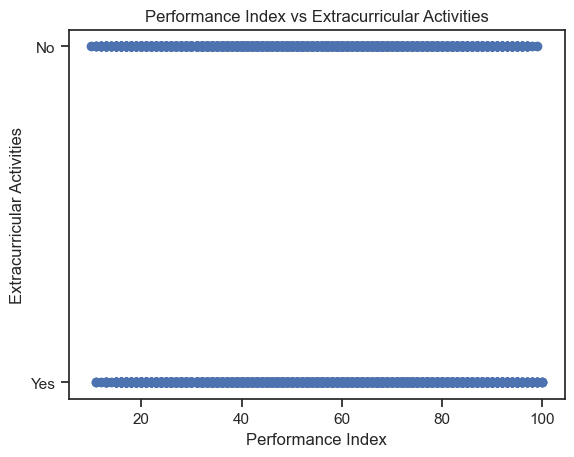

In [26]:
plt.scatter(StudentP_dfnew['Performance Index'],StudentP_dfnew['Extracurricular Activities'])
plt.title('Performance Index vs Extracurricular Activities')
plt.xlabel('Performance Index')
plt.ylabel('Extracurricular Activities')
plt.show()

#### Model Building

In [27]:
StudentP_dfnew.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,Yes,1.454025,-1.249715,91.0
1,-0.383205,0.724912,No,-1.491315,-0.900925,65.0
2,1.161822,-1.064438,Yes,0.275889,-0.900925,45.0
3,0.003052,-1.006717,Yes,-0.902247,-0.900925,36.0
4,0.775566,0.320865,No,0.864957,0.145444,66.0


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [30]:
data= StudentP_dfnew.copy()

In [31]:
data.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9.873000e+03,9.873000e+03,9873,9.873000e+03,9.873000e+03,9873.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,4986,NaN,NaN,NaN
mean,-8.672177e-17,-8.132415e-17,NaN,2.437925e-16,-1.169484e-16,55.216651
std,1.000051e+00,1.000051e+00,NaN,1.000051e+00,1.000051e+00,19.208570
min,-1.541976e+00,-1.699369e+00,NaN,-1.491315e+00,-1.598505e+00,10.000000
25%,-7.694624e-01,-8.912755e-01,NaN,-9.022472e-01,-9.009252e-01,40.000000
50%,3.051559e-03,-2.546084e-02,NaN,2.758888e-01,1.454439e-01,55.000000
75%,7.755655e-01,8.980748e-01,NaN,8.649568e-01,8.430232e-01,70.000000


In [32]:
le = LabelEncoder()

In [33]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,Yes,1.454025,-1.249715,91.0
1,-0.383205,0.724912,No,-1.491315,-0.900925,65.0
2,1.161822,-1.064438,Yes,0.275889,-0.900925,45.0
3,0.003052,-1.006717,Yes,-0.902247,-0.900925,36.0
4,0.775566,0.320865,No,0.864957,0.145444,66.0


In [35]:
data['Extracurricular Activities']=le.fit_transform(data['Extracurricular Activities'])

In [36]:
X =data.drop('Performance Index', axis=1)
y= data['Performance Index']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
model=LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

In [41]:
print("Mean squared Error:" ,mse)
print("R-squared:", r2)

Mean squared Error: 4.305900938538479
R-squared: 0.9884301209927054
